## Predicting House Prices

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
austin_houses = pd.read_csv("austinHousingData.csv")

In [3]:
austin_houses.head(4)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...


In [4]:
austin_houses.columns

Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

In [5]:
austin_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [6]:
austin_houses.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,...,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,...,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,...,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,...,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,...,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,...,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


In [7]:
austin_houses.shape

(15171, 47)

In [8]:
# Cheking for missing values
austin_houses.isnull().sum()

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   0
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

In [9]:
austin_houses.nunique()

zpid                          15171
city                              9
streetAddress                 15164
zipcode                          48
description                   15133
latitude                      14410
longitude                     12480
propertyTaxRate                   3
garageSpaces                     14
hasAssociation                    2
hasCooling                        2
hasGarage                         2
hasHeating                        2
hasSpa                            2
hasView                           2
homeType                         10
parkingSpaces                    14
yearBuilt                       115
latestPrice                    2365
numPriceChanges                  22
latest_saledate                 958
latest_salemonth                 12
latest_saleyear                   4
latestPriceSource               225
numOfPhotos                     151
numOfAccessibilityFeatures        8
numOfAppliances                  13
numOfParkingFeatures        

### Data Exploration and visualization

In [10]:
austin_houses.head(3)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...


In [11]:
austin_houses['latestPrice'].unique

<bound method Series.unique of 0        305000.0
1        295000.0
2        256125.0
3        240000.0
4        239900.0
           ...   
15166    330000.0
15167    550000.0
15168    875000.0
15169    420000.0
15170    374900.0
Name: latestPrice, Length: 15171, dtype: float64>

Text(0.5, 1.0, 'Plot Showing Latest Price Distribution in the Area')

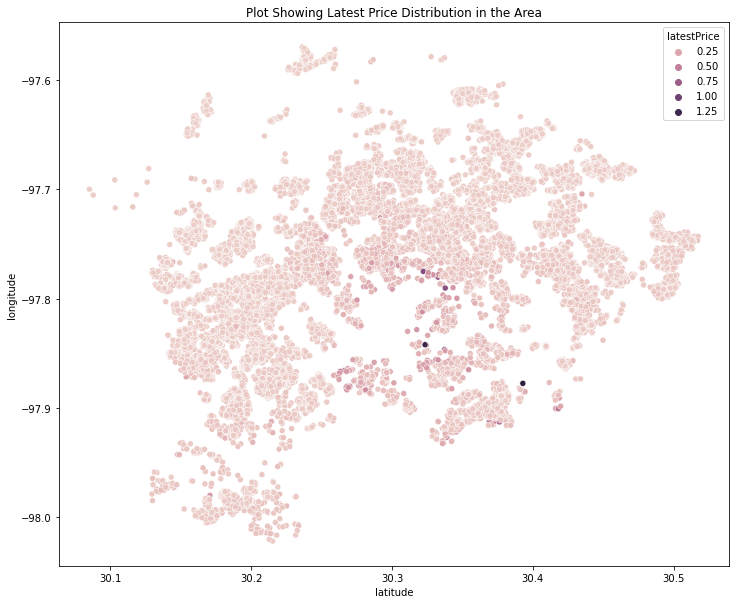

In [12]:
# Latitude and longitude plot
plt.figure(figsize = (12,10))
sns.scatterplot(x = "latitude", y = "longitude", hue = "latestPrice" , data = austin_houses)
plt.title("Plot Showing Latest Price Distribution in the Area")

Seems most of the latest prices for houses are about $25,000 

Text(0.5, 1.0, 'Plot Showing Average School Rating Distribution in the Area')

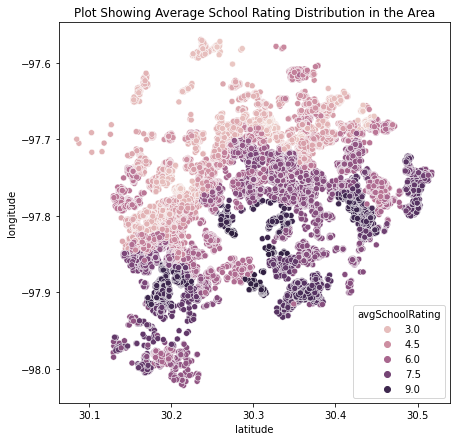

In [13]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = "latitude", y = "longitude", hue = "avgSchoolRating" ,data = austin_houses)
plt.title("Plot Showing Average School Rating Distribution in the Area")

In [14]:
austin_houses.nunique()

zpid                          15171
city                              9
streetAddress                 15164
zipcode                          48
description                   15133
latitude                      14410
longitude                     12480
propertyTaxRate                   3
garageSpaces                     14
hasAssociation                    2
hasCooling                        2
hasGarage                         2
hasHeating                        2
hasSpa                            2
hasView                           2
homeType                         10
parkingSpaces                    14
yearBuilt                       115
latestPrice                    2365
numPriceChanges                  22
latest_saledate                 958
latest_salemonth                 12
latest_saleyear                   4
latestPriceSource               225
numOfPhotos                     151
numOfAccessibilityFeatures        8
numOfAppliances                  13
numOfParkingFeatures        

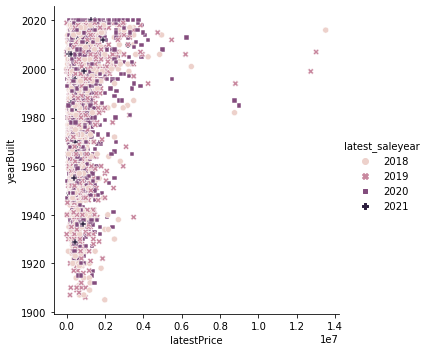

In [15]:
sns.relplot(x = "latestPrice", y = "yearBuilt", hue = "latest_saleyear", data = austin_houses,style = "latest_saleyear" )

Houses built in the 1900 - 1980 have lower prices compared to houses built from 2000

Text(0.5, 1.0, 'Plot Showing Average School Rating Distribution in the Area')

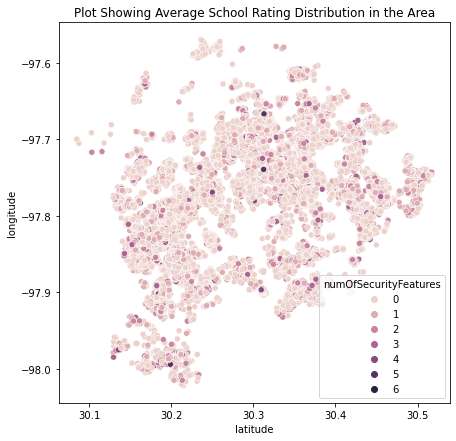

In [16]:
plt.figure(figsize = (7,7))
sns.scatterplot(x = "latitude", y = "longitude", hue = "numOfSecurityFeatures" ,data = austin_houses)
plt.title("Plot Showing Average School Rating Distribution in the Area")

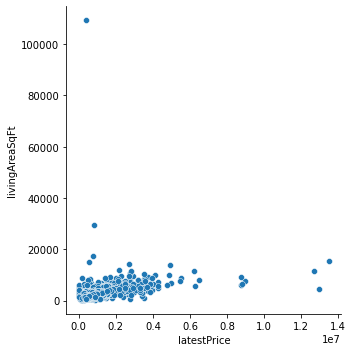

In [17]:
# what else would I want to know if a prospective home buyer?
sns.relplot(x = 'latestPrice',y = 'livingAreaSqFt',data = austin_houses)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

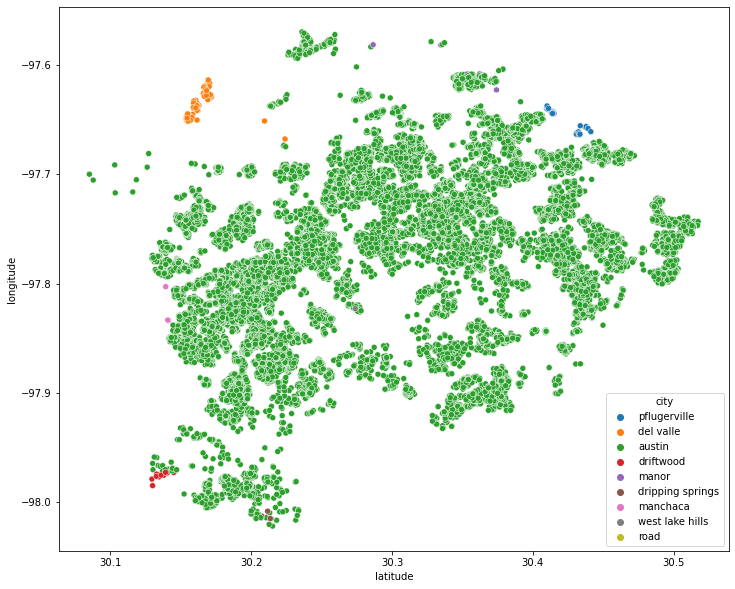

In [18]:
plt.figure(figsize = (12,10))
sns.scatterplot(x = "latitude", y = "longitude", hue = "city" ,data = austin_houses)

In [19]:
austin_houses.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'pflugerville'),
  Text(1, 0, 'del valle'),
  Text(2, 0, 'austin'),
  Text(3, 0, 'driftwood'),
  Text(4, 0, 'manor'),
  Text(5, 0, 'dripping springs'),
  Text(6, 0, 'manchaca'),
  Text(7, 0, 'west lake hills'),
  Text(8, 0, 'road')])

<Figure size 864x720 with 0 Axes>

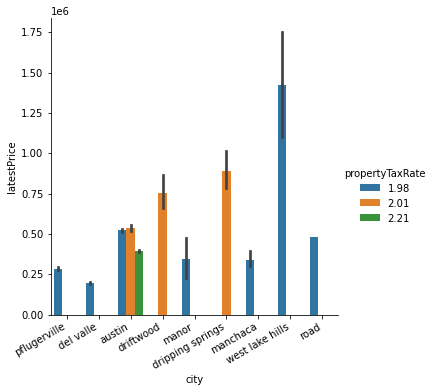

In [20]:
plt.figure(figsize = (12,10))
sns.catplot(x = "city", y = 'latestPrice', hue = 'propertyTaxRate',data = austin_houses,kind = 'bar')
plt.xticks(rotation = 30, ha = 'right')

west lake hills has the highest prices (1.98 property tax rate), follwed by dripping springs, only austin has the highest tax rates of 2.21 but lower prices. Del valle has the lowest prices with lower tax rates. 

<AxesSubplot:xlabel='latestPrice', ylabel='Density'>

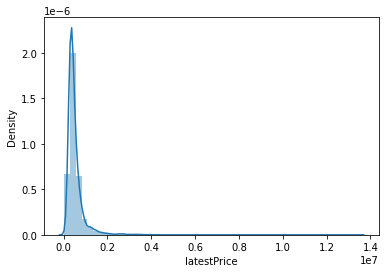

In [21]:
# Distribution plot of latest sale price
sns.distplot(austin_houses['latestPrice'])

In [22]:
# Corelation analysis
cor_analysis = austin_houses.corr()
cor_analysis

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
zpid,1.000000,-0.052805,-0.055352,0.005886,-0.011396,-0.001927,0.107227,-0.051843,0.021325,-0.076695,...,0.001609,-0.002406,0.017113,0.047420,-0.048422,-0.035425,-0.064781,0.052729,-0.037354,-0.001502
zipcode,-0.052805,1.000000,-0.036440,-0.126135,-0.172846,-0.016600,-0.005704,0.075049,-0.033000,0.051158,...,0.071017,-0.024317,0.054053,0.027830,0.055618,0.140192,0.106682,-0.055685,0.025278,-0.051818
latitude,-0.055352,-0.036440,1.000000,0.347597,0.450187,0.019153,-0.056766,0.037770,0.017619,0.028263,...,0.128212,-0.019787,0.130216,-0.043530,0.260637,0.077653,-0.010083,0.053388,0.078542,0.047176
longitude,0.005886,-0.126135,0.347597,1.000000,-0.013746,-0.115317,-0.299097,-0.063926,-0.033348,-0.040448,...,-0.029789,-0.220102,0.452437,-0.288116,-0.557531,-0.333619,-0.597129,-0.335719,-0.285123,-0.157333
propertyTaxRate,-0.011396,-0.172846,0.450187,-0.013746,1.000000,0.026430,0.125105,0.034295,0.016016,0.021256,...,-0.051873,-0.020720,-0.034695,-0.011178,0.184755,0.158509,-0.021681,0.066139,0.098455,0.057537
garageSpaces,-0.001927,-0.016600,0.019153,-0.115317,0.026430,1.000000,0.044129,0.061061,0.822110,0.052476,...,0.029057,0.044912,-0.064993,0.079953,0.092672,0.034451,0.062567,0.199309,0.163637,0.094983
hasAssociation,0.107227,-0.005704,-0.056766,-0.299097,0.125105,0.044129,1.000000,0.077942,0.005075,0.030312,...,0.125484,0.114608,-0.027227,0.309472,0.297089,0.408835,0.239780,0.336580,0.226482,0.308490
hasCooling,-0.051843,0.075049,0.037770,-0.063926,0.034295,0.061061,0.077942,1.000000,0.055453,0.679140,...,0.003104,0.011005,-0.005690,0.005214,0.071524,0.106567,0.092889,0.124231,0.116861,0.043509
hasGarage,0.021325,-0.033000,0.017619,-0.033348,0.016016,0.822110,0.005075,0.055453,1.000000,0.059077,...,0.004289,0.013887,-0.024208,0.012441,0.033512,-0.014187,0.009705,0.083859,0.055123,0.067590
hasHeating,-0.076695,0.051158,0.028263,-0.040448,0.021256,0.052476,0.030312,0.679140,0.059077,1.000000,...,-0.013296,-0.001616,-0.003335,-0.020551,0.048103,0.056259,0.064365,0.064830,0.073624,0.026324


<AxesSubplot:>

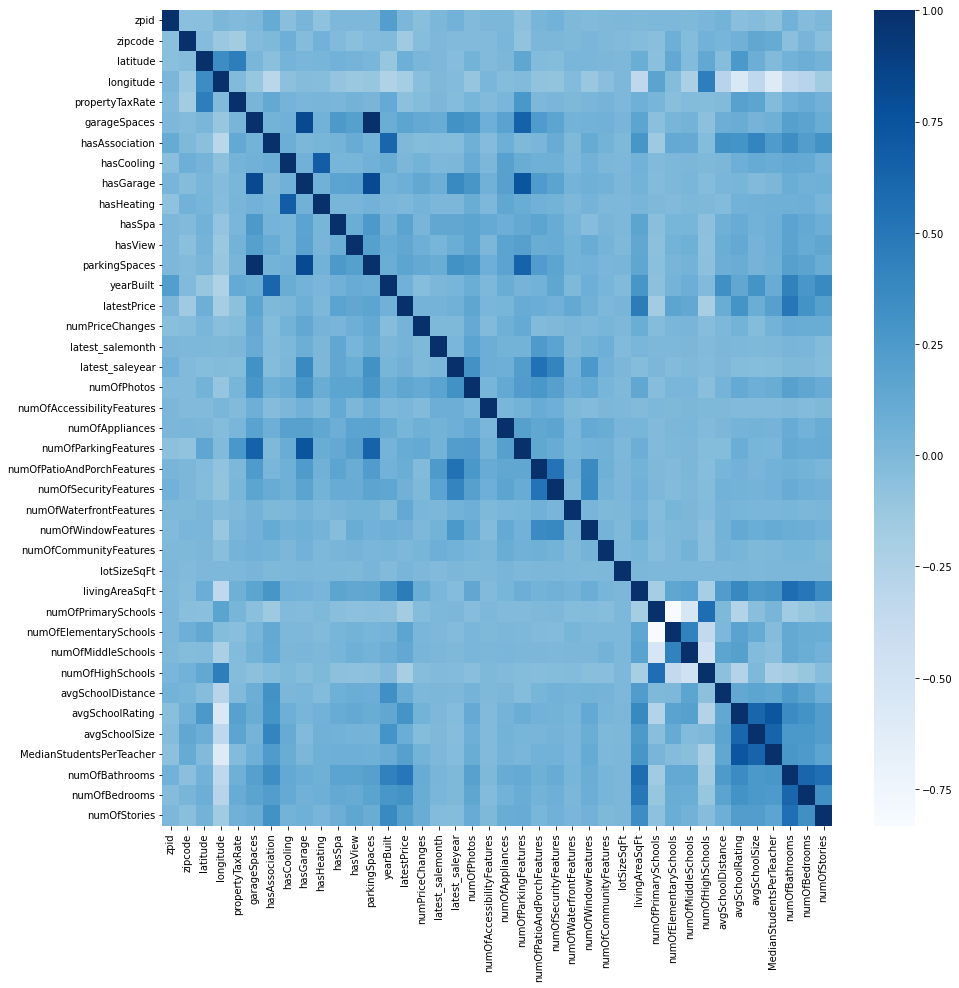

In [23]:
plt.figure(figsize = (15,15))
sns.heatmap(cor_analysis,cmap='Blues')

In [24]:
austin_houses.columns

Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

In [27]:
houses = austin_houses.drop(['homeImage','description','zipcode','streetAddress','zpid'], axis = 1)

In [28]:
houses.columns

Index(['city', 'latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
       'hasView', 'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories'],
      dtype='object')

In [29]:
houses_dummies = pd.get_dummies(houses)

In [31]:
houses_dummies.columns

Index(['latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
       'hasView',
       ...
       'latestPriceSource_Verde Builders Group',
       'latestPriceSource_Virginia Ivey Realtors, LLC',
       'latestPriceSource_Vox Real Estate, LLC',
       'latestPriceSource_Walzel Properties',
       'latestPriceSource_Waterloo Realty, LLC',
       'latestPriceSource_West Austin Properties',
       'latestPriceSource_Wilson & Goldrick REALTORS',
       'latestPriceSource_Yellow Door Realty', 'latestPriceSource_Zillow',
       'latestPriceSource_eXp Realty LLC'],
      dtype='object', length=1240)

In [32]:
houses_dummies.head(2)

,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,...,latestPriceSource_Verde Builders Group,"latestPriceSource_Virginia Ivey Realtors, LLC","latestPriceSource_Vox Real Estate, LLC",latestPriceSource_Walzel Properties,"latestPriceSource_Waterloo Realty, LLC",latestPriceSource_West Austin Properties,latestPriceSource_Wilson & Goldrick REALTORS,latestPriceSource_Yellow Door Realty,latestPriceSource_Zillow,latestPriceSource_eXp Realty LLC
0,30.430632,-97.663078,1.98,2,True,True,True,True,False,False,...,0,0,0,0,0,0,0,0,0,0
1,30.432673,-97.661697,1.98,2,True,True,True,True,False,False,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [33]:
y = houses_dummies['latestPrice']
x = houses_dummies.drop(['latestPrice'], axis = 1)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import Ridge, LinearRegression


In [37]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [38]:
y_pred = model.predict(xtest)

In [39]:
print("Training Accuracy :", model.score(xtrain, ytrain))
print("Testing Accuracy :", model.score(xtest, ytest))

Training Accuracy : 0.5730335982616388
Testing Accuracy : -0.6510252693415948


In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
regressor = RandomForestRegressor()
regressor.fit(xtrain, ytrain)

RandomForestRegressor()

In [42]:
y_pred = regressor.predict(xtest)

In [43]:
print("Training Accuracy :", regressor.score(xtrain, ytrain))
print("Testing Accuracy :", regressor.score(xtest, ytest))

Training Accuracy : 0.9556473756469605
Testing Accuracy : 0.5692458965357966


## Improve the Models 